In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("../data/cardekho_imputated.csv",index_col=0)
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## 1.data cleaning

In [3]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [4]:
df.drop(columns=['car_name','brand'],inplace=True)
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              15411 non-null  object 
 1   vehicle_age        15411 non-null  int64  
 2   km_driven          15411 non-null  int64  
 3   seller_type        15411 non-null  object 
 4   fuel_type          15411 non-null  object 
 5   transmission_type  15411 non-null  object 
 6   mileage            15411 non-null  float64
 7   engine             15411 non-null  int64  
 8   max_power          15411 non-null  float64
 9   seats              15411 non-null  int64  
 10  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


In [6]:
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(exclude=np.number).columns
print(f"\nnumberic columns:{num_col}")
print(f"\ncategorical columns:{cat_col}")


numberic columns:Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

categorical columns:Index(['model', 'seller_type', 'fuel_type', 'transmission_type'], dtype='object')


In [7]:
for i in cat_col:
    print(df[i].value_counts())
    print(f"{i} has {df[i].nunique()} uniuqe values")
    print('='*20)

model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64
model has 120 uniuqe values
seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64
seller_type has 3 uniuqe values
fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64
fuel_type has 5 uniuqe values
transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64
transmission_type has 2 uniuqe values


<Figure size 600x400 with 0 Axes>

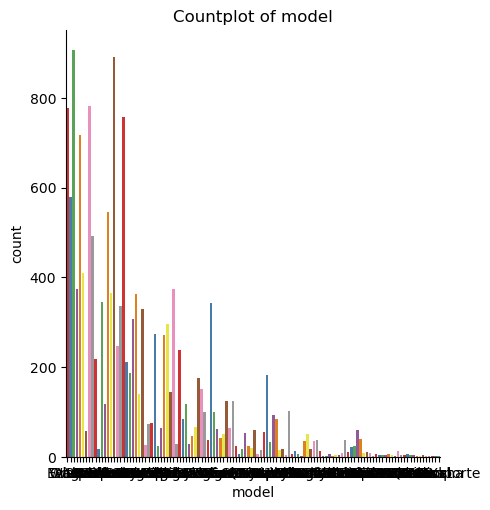

<Figure size 600x400 with 0 Axes>

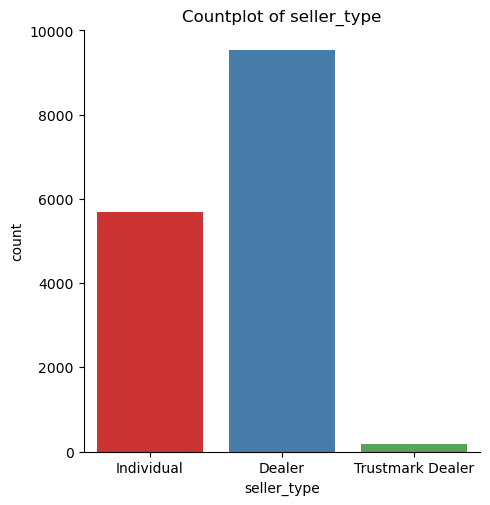

<Figure size 600x400 with 0 Axes>

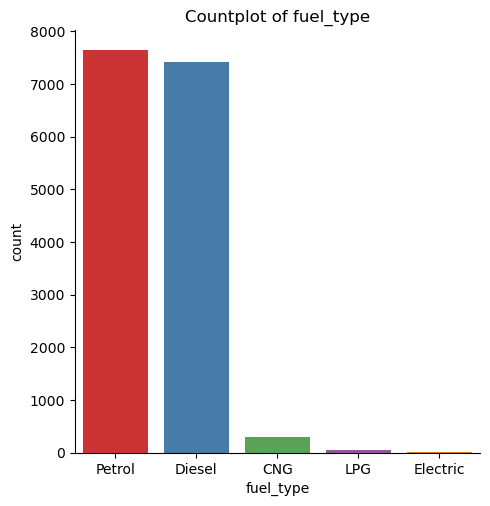

<Figure size 600x400 with 0 Axes>

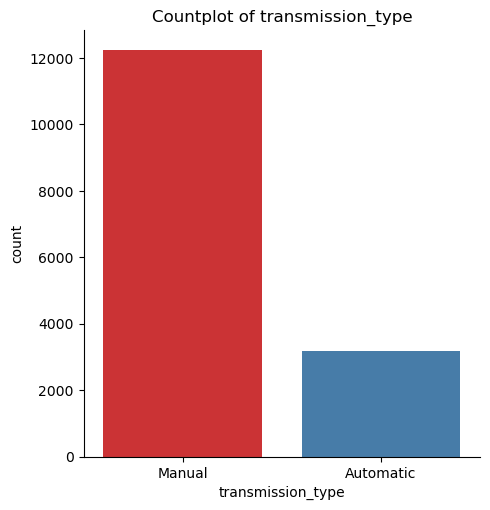

In [8]:
for col in cat_col:
    plt.figure(figsize=(6,4))
    sns.catplot(x=col, data=df,palette='Set1', kind='count')
    plt.title(f"Countplot of {col}")

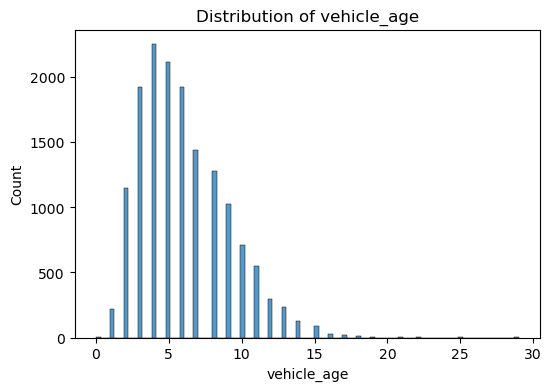

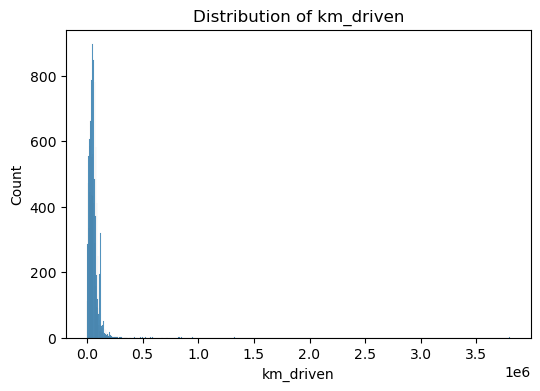

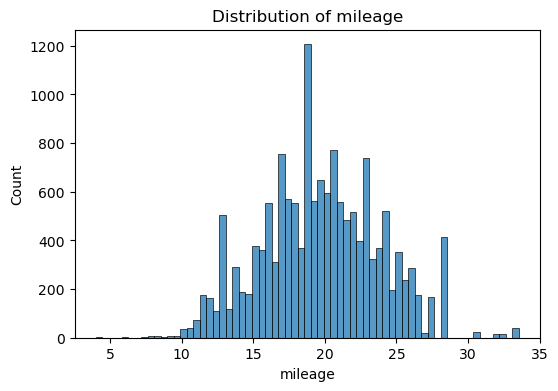

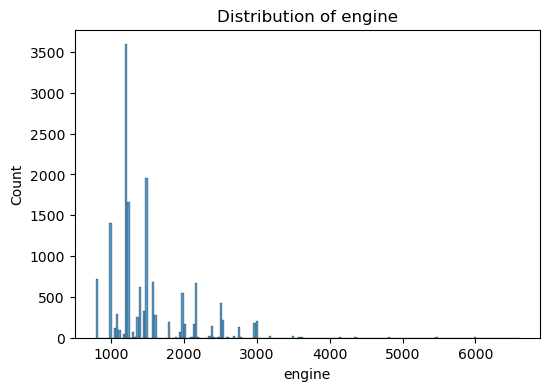

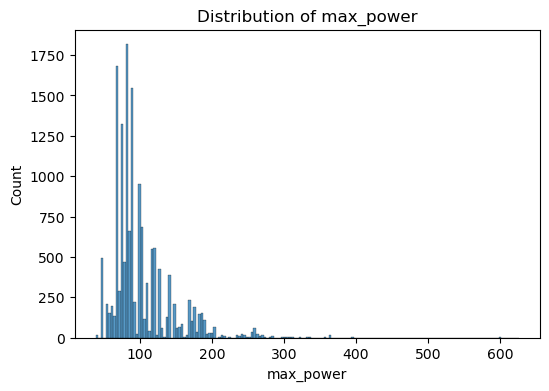

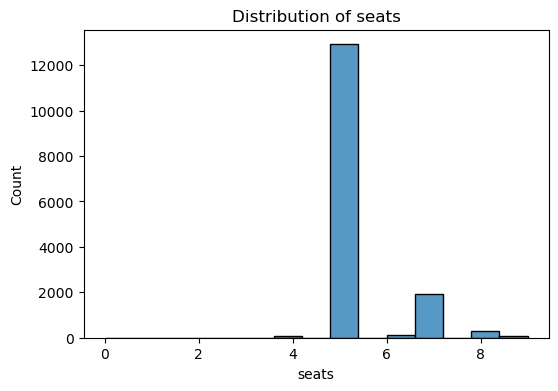

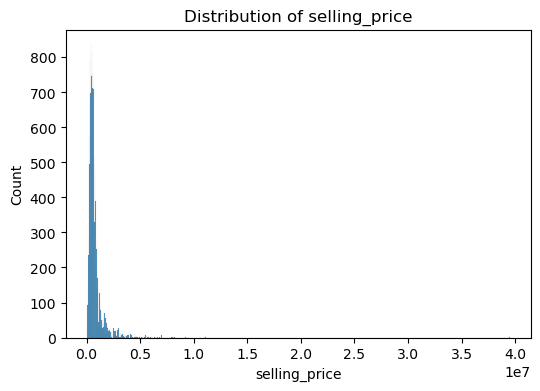

In [9]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(x=col, data=df,palette='Set1')
    plt.title(f"Distribution of {col}")
#     plt.xticks(plt.xticks()[0], [f"{x:.2f}" for x in plt.xticks()[0]])
    plt.show()

In [10]:
np.max(df["selling_price"])
np.min(df["selling_price"])
np.median(df["selling_price"])

556000.0

In [11]:
df[num_col].describe().round(2)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [12]:
df.columns

Index(['model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

## 2. Model Training

In [90]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder   
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
X=df.drop("selling_price",axis=1)
y=df["selling_price"]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
num_col=num_col.drop("selling_price")

In [47]:
num_col

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [48]:
te_col=["model"]

In [49]:
cat_col_new=cat_col.drop(te_col)

In [50]:
num_pipe=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

In [51]:
ohe_pipe=Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [66]:
te_pipe=Pipeline([
    ('impute',SimpleImputer(strategy="most_frequent")),
    ('te',TargetEncoder(smoothing=10.0, min_samples_leaf=5,handle_unknown="value",handle_missing='value'))
])

In [67]:
preprocessor=ColumnTransformer([
    ('num',num_pipe, num_col),
    ('ohe',ohe_pipe,cat_col_new),
    ('te',te_pipe,te_col)
],remainder='drop')

In [68]:
regressors = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(random_state=0),
    "Lasso": Lasso(random_state=0, max_iter=10000),
    "ElasticNet": ElasticNet(random_state=0, max_iter=10000),
    "BayesianRidge": BayesianRidge(),
    "DecisionTree": DecisionTreeRegressor(random_state=0),
    "SVR": SVR(),                      
    "KNN": KNeighborsRegressor(n_jobs=-1),
    "RandomForest": RandomForestRegressor(random_state=0, n_jobs=-1),
    "AdaBoost": AdaBoostRegressor(random_state=0),
    "GB": GradientBoostingRegressor(random_state=0),
    "XGB": XGBRegressor(random_state=0, n_jobs=-1),
}

In [69]:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",       
    "MSE": "neg_mean_squared_error"
}

In [70]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [71]:
print(X_train.columns)

Index(['model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


In [84]:
baseline_result=[]
for name, estimator in regressors.items():
    pipe=Pipeline([
        ('preprocessor',preprocessor),
        ('reg',estimator)
    ])
    scores=cross_validate(pipe,X_train,y_train, cv=cv, scoring=scoring)
    baseline_result.append({
        'name':name,
        "r2_mean":np.mean(scores["test_R2"]),
        "mae":-np.mean(scores["test_MAE"]),
        "mse":-np.mean(scores["test_MSE"])
    })

In [88]:
baseline_df=pd.DataFrame(baseline_result).sort_values(by="r2_mean",ascending=False).round(2)
baseline_df

,name,r2_mean,mae,mse
10,GB,0.84,109976.31,1.636274e+11
11,XGB,0.83,97392.76,1.687200e+11
8,RandomForest,0.83,98851.23,1.703279e+11
5,DecisionTree,0.77,125881.01,2.245553e+11
7,KNN,0.74,115235.71,2.528388e+11
9,AdaBoost,0.70,279346.06,2.567420e+11
2,Lasso,0.63,224890.57,3.303239e+11
0,Linear,0.63,224892.11,3.303237e+11
1,Ridge,0.63,224866.21,3.303389e+11
3,ElasticNet,0.61,213767.02,3.495565e+11


In [89]:
models_params = {
    "RF": (
        RandomForestRegressor(random_state=0, n_jobs=-1),
        {
            "reg__n_estimators": [100, 200, 500],
            "reg__max_depth": [None, 10, 20, 30],
            "reg__max_features": ["sqrt", "log2", 0.3, 0.5],
            "reg__min_samples_split": [2, 5, 10],
            "reg__min_samples_leaf": [1, 2, 4]
        }
    ),

    "GB": (
        GradientBoostingRegressor(random_state=0),
        {
            "reg__n_estimators": [100, 200, 500],
            "reg__learning_rate": [0.01, 0.05, 0.1],
            "reg__max_depth": [3, 5, 7],
            "reg__min_samples_split": [2, 5, 10],
            "reg__min_samples_leaf": [1, 2, 4],
            "reg__subsample": [0.6, 0.8, 1.0]
        }
    ),

    "XGB": (
        XGBRegressor(random_state=0, n_jobs=-1, verbosity=0),
        {
            "reg__n_estimators": [200, 500, 800],
            "reg__learning_rate": [0.01, 0.05, 0.1],
            "reg__max_depth": [3, 5, 7, 10],
            "reg__subsample": [0.6, 0.8, 1.0],
            "reg__colsample_bytree": [0.6, 0.8, 1.0],
            "reg__reg_alpha": [0, 0.01, 0.1],
            "reg__reg_lambda": [1, 5, 10]
        }
    )
}


In [91]:
tuning_results = []
for name, (estimator, param_dist) in models_params.items():
    print(f"\n--- Tuning {name} ---")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('reg', estimator)
    ])
    rs = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        n_iter=30,                 
        cv=cv,
        scoring='r2',         
        n_jobs=-1,
        random_state=42,
    )
    rs.fit(X_train, y_train)
    print("best params:", rs.best_params_)
    print("best cv score:", rs.best_score_)
    tuning_results.append({
        'name': name,
        'best_score': rs.best_score_,
        'best_params': rs.best_params_,
        'best_estimator': rs.best_estimator_
    })


--- Tuning RF ---
best params: {'reg__n_estimators': 200, 'reg__min_samples_split': 2, 'reg__min_samples_leaf': 1, 'reg__max_features': 0.3, 'reg__max_depth': None}
best cv score: 0.841779969445114

--- Tuning GB ---
best params: {'reg__subsample': 1.0, 'reg__n_estimators': 100, 'reg__min_samples_split': 2, 'reg__min_samples_leaf': 2, 'reg__max_depth': 3, 'reg__learning_rate': 0.1}
best cv score: 0.8380272656772361

--- Tuning XGB ---
best params: {'reg__subsample': 1.0, 'reg__reg_lambda': 10, 'reg__reg_alpha': 0, 'reg__n_estimators': 500, 'reg__max_depth': 7, 'reg__learning_rate': 0.1, 'reg__colsample_bytree': 0.6}
best cv score: 0.867978322505951


In [93]:
tuning_df = pd.DataFrame(tuning_results)
tuning_df

,name,best_score,best_params,best_estimator
0,RF,0.841780,"{'reg__n_estimators': 200, 'reg__min_samples_s...","(ColumnTransformer(transformers=[('num',\n ..."
1,GB,0.838027,"{'reg__subsample': 1.0, 'reg__n_estimators': 1...","(ColumnTransformer(transformers=[('num',\n ..."
2,XGB,0.867978,"{'reg__subsample': 1.0, 'reg__reg_lambda': 10,...","(ColumnTransformer(transformers=[('num',\n ..."


In [95]:
best_pipe=tuning_df.iloc[2]["best_estimator"]
y_pred=best_pipe.predict(X_test)

In [97]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test regression report:")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:,.2f}")
print(f"MSE  : {mse:,.2f}")
print(f"RMSE : {rmse:,.2f}")

Test regression report:
R2   : 0.9479
MAE  : 91,450.52
MSE  : 39,250,153,472.00
RMSE : 198,116.51


## 3) Visual check for linear relationship

In [100]:
res_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "residual": y_test - y_pred
})

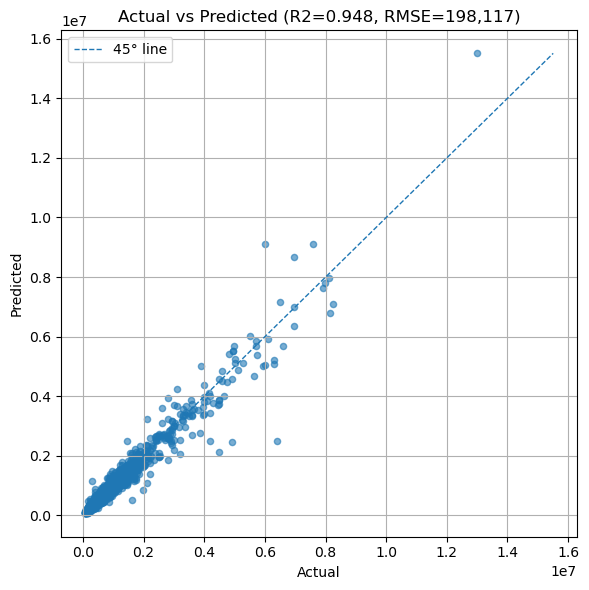

In [101]:
# 1) Scatter: Actual vs Predicted
plt.figure(figsize=(6,6))
minv = min(res_df['y_true'].min(), res_df['y_pred'].min())
maxv = max(res_df['y_true'].max(), res_df['y_pred'].max())
plt.scatter(res_df['y_true'], res_df['y_pred'], alpha=0.6, s=20)
plt.plot([minv, maxv], [minv, maxv], linestyle='--', linewidth=1, label='45° line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R2={r2:.3f}, RMSE={rmse:,.0f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

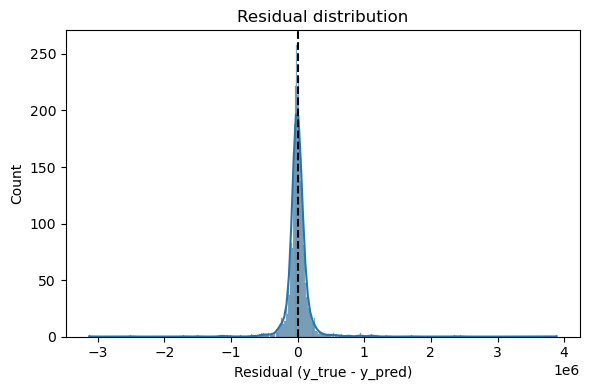

In [102]:
# 2)  residual（Histogram + KDE）
plt.figure(figsize=(6,4))
sns.histplot(res_df['residual'], kde=True)
plt.axvline(0, color='k', linestyle='--')
plt.title('Residual distribution')
plt.xlabel('Residual (y_true - y_pred)')
plt.tight_layout()
plt.show()

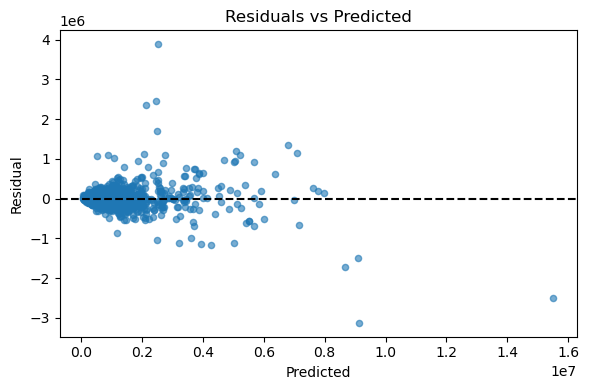

In [103]:
# 3) residual vs y_pred
plt.figure(figsize=(6,4))
plt.scatter(res_df['y_pred'], res_df['residual'], alpha=0.6, s=20)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()